
# DS400: Assignment 5 (Python)

##### Daniel Hinz (Student ID: 6302371)
##### January 25 2023

## Preprocessing

(1) In the folder data you will find the original images. Each image is labeled as either pizza or no pizza.
Apply the pipeline below and export to csv.

In [1]:
# Imports
import os
import numpy as np
import pandas as pd
import requests
import time



In [2]:
# set directory
os.chdir("D:/Dokumente/Studium/Master_DataScience/Assignment5")

In [15]:
# load key, note that key is safed as a local file in my directory
with open("key.txt") as f:
  key = f.readlines()[0]

# get request to api
APIcontent = requests.get("https://app.ticketmaster.com/discovery/v2/venues",
                           params = {"apikey":key, "locale":"*", "countryCode":"DE"}).json()



In [7]:
print(APIcontent["page"])

{'size': 20, 'totalElements': 12934, 'totalPages': 647, 'number': 0}


In [10]:
# Function to query the nested dictionary which we receive from the API

def query_dict(dict_, *keys):
    """
    This function requires a dictionary and one or multiple keys as input. Output is the element stored behind the key or a None
    if that element is not present
    """
    
    # for some instances we have two keys, if that is the case, query both an get the element
    for key in keys:
        try:
            dict_ = dict_[key]
        except:
    # if that particular entry is not present return None
            return None
    return dict_

In [11]:
# Define output Dataframe with columns that we would like to extract
venues = pd.DataFrame(columns = ["name", "city", "postalCode", "address", "url", "longitude", "latitude"])

for i in APIcontent["_embedded"]["venues"]:
    
    objects = []
    
    objects.append(query_dict(i,"name"))
    objects.append(query_dict(i,"city","name"))
    objects.append(query_dict(i,"postalCode"))
    objects.append(query_dict(i,"address","line1"))
    objects.append(query_dict(i,"url"))
    objects.append(query_dict(i,"location","longitude"))
    objects.append(query_dict(i,"location","latitude"))

    
    venues.loc[len(venues)] = objects

In [12]:
venues.head()

,name,city,postalCode,address,url,longitude,latitude
0,Grosse Freiheit 36,Hamburg,22767,Grosse Freiheit 36,http://www.ticketmaster.de/venue/287636,9.957905,53.551187
1,Gruenspan,Hamburg,22767,Grosse Freiheit 58,http://www.ticketmaster.de/venue/287155,9.958075,53.551885
2,Huxleys Neue Welt,Berlin,10967,Hasenheide 107 – 113,http://www.ticketmaster.de/venue/286842,13.42138,52.486391
3,Zentrum am Park,Emmelshausen,56281,Rhein-Mosel-Straße 45,https://www.ticketmaster.de/venue/zentrum-am-p...,7.55656,50.15544
4,Stadthalle (Theatersaal),Mülheim,45479,Theodor-Heuss-Platz 1,https://www.ticketmaster.de/venue/stadthalle-t...,6.87471,51.42778


### Interacting with the API advanced
We 647 pages with 20 elements each. By setting the element size to 500, we need 26 pages to query

In [16]:
# initiate output dataframe
venues_all = pd.DataFrame(columns = ["name", "city", "postalCode", "address", "url", "longitude", "latitude"])

# loop over all 26 pages
for page in range(26):
    APIcontent = requests.get("https://app.ticketmaster.com/discovery/v2/venues",
                               params = {"apikey":key, "locale":"*","countryCode":"DE", "page":page, "size":500}).json()
    
    # wait for 2 seconds before the next request
    time.sleep(1) 
    # some random pages produce errors. Maybe its because we are using the same public key, the query limit is reached.
    # if an error occurs, we wait some seconds and try again
    try:
       	for i in APIcontent["_embedded"]["venues"]:
               
                # initiate empty list
               objects = []
               
                # add each entry to the list
               objects.append(query_dict(i,"name"))
               objects.append(query_dict(i,"city","name"))
               objects.append(query_dict(i,"postalCode"))
               objects.append(query_dict(i,"address","line1"))
               objects.append(query_dict(i,"url"))
               objects.append(query_dict(i,"location","longitude"))
               objects.append(query_dict(i,"location","latitude"))
               
                # append list as new row in dataframe
               venues_all.loc[len(venues_all)] = objects

    except:
        # if we get an error from the api, wait 1 seconds and try again
        time.sleep(1) 
        page = page-1
        print("error at:", page)
        
venues_all.head(n=10)

,name,city,postalCode,address,url,longitude,latitude
0,Grosse Freiheit 36,Hamburg,22767,Grosse Freiheit 36,http://www.ticketmaster.de/venue/287636,9.957905,53.551187
1,Gruenspan,Hamburg,22767,Grosse Freiheit 58,http://www.ticketmaster.de/venue/287155,9.958075,53.551885
2,Huxleys Neue Welt,Berlin,10967,Hasenheide 107 – 113,http://www.ticketmaster.de/venue/286842,13.42138,52.486391
3,Zentrum am Park,Emmelshausen,56281,Rhein-Mosel-Straße 45,https://www.ticketmaster.de/venue/zentrum-am-p...,7.55656,50.15544
4,Stadthalle (Theatersaal),Mülheim,45479,Theodor-Heuss-Platz 1,https://www.ticketmaster.de/venue/stadthalle-t...,6.87471,51.42778
5,Schlossgarten,Bruchsal,76646,Schloss Bruchsal,https://www.ticketmaster.de/venue/schlossgarte...,8.59908,49.12692
6,Stadthalle,Hockenheim,68766,Rathausstraße 3,https://www.ticketmaster.de/venue/stadthalle-h...,8.54908,49.31849
7,FZW,Dortmund,44263,Ritterstraße 20,https://www.ticketmaster.de/venue/fzw-dortmund...,7.4501,51.51481
8,Arena Trier,Trier,54292,Fort-Worth-Platz 1,https://www.ticketmaster.de/venue/arena-trier-...,6.66426,49.77183
9,Eissporthalle,Memmingen,87700,Hühnerbergstraße 19,https://www.ticketmaster.de/venue/eissporthall...,10.16293,47.97999


In [17]:
venues_all.shape

(12934, 7)

### Visualizing the extracted data

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [19]:
# drop all rows with NA in longitude and latitude as we cannot plot missing coordinates
venues_all.dropna(axis = 0, subset = ["longitude", "latitude"], inplace=True)

# transform to float
venues_all["longitude"] = venues_all["longitude"].apply(lambda x: float(x))
venues_all["latitude"] = venues_all["latitude"].apply(lambda x: float(x))

<AxesSubplot:>

<Figure size 640x480 with 0 Axes>

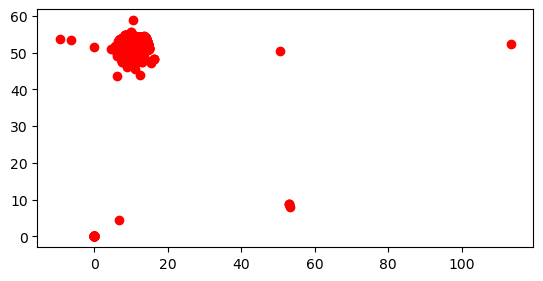

In [20]:
# we have to transform the coordinates to a geodataframe
gdf = gpd.GeoDataFrame(venues_all,
                       geometry=gpd.points_from_xy(venues_all.longitude, venues_all.latitude))


# load map
map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# plot points in Germany
plt.figure(1)
ax = map[map.name == "Germany"].plot()
gdf.plot(ax=ax, color = "red")

The visualization is kind of nonsense because there are some coordinates outside of Germany. So lets remove outlier points

<AxesSubplot:>

<Figure size 640x480 with 0 Axes>

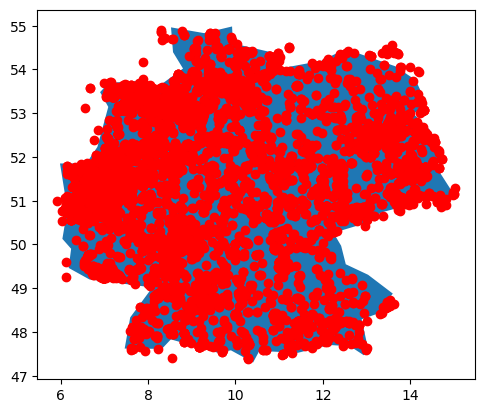

In [21]:
# keep venues inside Germany
gdf = gdf[(gdf["longitude"] > 5.866) & (gdf["longitude"] < 15.042)]
gdf = gdf[(gdf["latitude"] > 47.270) & (gdf["latitude"] < 55.059)]

# plot again
plt.figure(2)
ax = map[map.name == "Germany"].plot()
gdf.plot(ax=ax, color = "red")



looks better

### Event locations in other countries

In [22]:
# lets pick Italy


# initiate output dataframe
venues_it = pd.DataFrame(columns = ["name", "city", "postalCode", "address", "url", "longitude", "latitude"])

# load api, no loop required only 300 venues exists
APIcontent = requests.get("https://app.ticketmaster.com/discovery/v2/venues",
                           params = {"apikey":key,  "locale":"*", "countryCode":"IT", "size":300}).json()

try:
   	for i in APIcontent["_embedded"]["venues"]:
           
            # initiate list
           objects = []
           
            # append each entry to list
           objects.append(query_dict(i,"name"))
           objects.append(query_dict(i,"city","name"))
           objects.append(query_dict(i,"postalCode"))
           objects.append(query_dict(i,"address","line1"))
           objects.append(query_dict(i,"url"))
           objects.append(query_dict(i,"location","longitude"))
           objects.append(query_dict(i,"location","latitude"))
           
            # append list as new row to dataframe
           venues_it.loc[len(venues_it)] = objects

except:
    # if we get an error from the api, wait 2 seconds and try again
    time.sleep(1) 
    page = page-1
    print("error at:", page)

In [23]:
venues_it.head()

,name,city,postalCode,address,url,longitude,latitude
0,Live Club,Milan,20056,"Via Giuseppe Mazzini, 58",None,9.5169274,45.5990796
1,ITALY,Gardone Riviera,25083,"Corso Zanardelli, 196",https://www.ticketmaster.be/venue/italy-gardon...,None,None
2,ITALY,Rubano,35030,via Liguria 1 Sarmeola di Rubano,https://www.ticketmaster.be/venue/italy-rubano...,11.809616,45.421793
3,ITALY,Rome,00187,Via del babuino 9,https://www.ticketmaster.be/venue/italy-rome-t...,12.477795,41.910066
4,ITALY,Modena,41121,Via Stella 22,https://www.ticketmaster.be/venue/italy-modena...,10.921577,44.644832


In [24]:
venues_it.shape

(300, 7)

## Visualize Italy

In [25]:
# remove rows without coordinates
venues_it.dropna(axis = 0, subset = ["longitude", "latitude"], inplace=True)

# change datatype to float
venues_it["longitude"] = venues_it["longitude"].apply(lambda x: float(x))
venues_it["latitude"] = venues_it["latitude"].apply(lambda x: float(x))

<AxesSubplot:>

<Figure size 640x480 with 0 Axes>

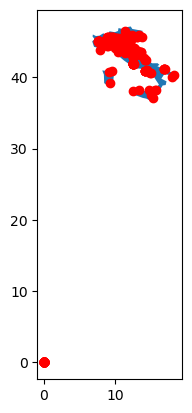

In [26]:
# initiate geodataframe
gdf_it = gpd.GeoDataFrame(venues_it,
                          geometry=gpd.points_from_xy(venues_it.longitude, venues_it.latitude))

# load map
map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# plot coordinates on italy map
plt.figure(3)
ax = map[map.name == "Italy"].plot()
gdf_it.plot(ax=ax, color = "red")


again we can spot outliers at (0,0). Lets remove them

<AxesSubplot:>

<Figure size 640x480 with 0 Axes>

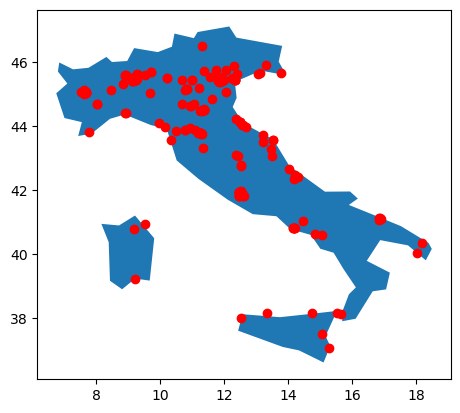

In [27]:
# remove outliers
gdf_it = gdf_it[gdf_it["longitude"] > 0]
gdf_it = gdf_it[gdf_it["latitude"] > 0]

plt.figure(4)
ax = map[map.name == "Italy"].plot()
gdf_it.plot(ax=ax, color = "red")

No need to filter by extreme country bounds because the outliers only appear at (0,0)